# Mutual Activation

#### Author(s):  Stanley Wang
#### Reference: [ Tyson et al (2003)](http://www.sciencedirect.com/science/article/pii/S0955067403000176) | [Download](https://cpi-catalog.000webhostapp.com/cpi-files/mutual_activation_b.cpi)

This is the 5th model from the Tyson et al (2003) paper. It describes a system with a positive feedback loop.

In this system a signal S facilitates the generation of a molecule R. R can do 2 things: it can degrade from the system or it can serve as a catalyst for a phosphorilation-dephosphorilation reaction between 2 molecules, E and EP. As EP is generated, in turn it helps the generation of R, thus creation a positive feedback loop (S generates R that generates EP that generates R). The interesting part of the plot is around S = 10.3, where there is a sudden jump in the concentration of R. This is a critical point of no return. If this threshold for S is reached, then no matter how the concentration of S varies, the system does not return to its previous state. This behaviour results in the upper pink line in the plot (observe that below the threshold value of S we just move along the pink line instead of jumping back down to the lower part of the graph). These kinds of systems play a role for example in cell death.

The CPi model captured the behaviour of the original system presented by Tyson et al. However, there is a numerical deviation between the CPi model and that of the original system. The most likely reason for this deviation is the assumption that was made in the original paper. According to the differential equations of the authors, the concentration of R does not depend on whether it is bound in the enzyme-substrate complex of the phosphorilation-dephosphorilation reaction. Because of this, in the original system R keeps degrading out of the system as it is bound in the complex, which is not realistic.

To overcome this issue, Stanley created a shadow species RX in the code that he explains in his dissertation. The presence of the shadow species results in the correct behaviour of the system shown in the plot, but with smaller numbers. From a biological point of view this discrepancy is irrelevant, because the original model is not based on a real biological system either; it is an artifical example of a system that can be found in living organisms.

As for "fixing" the problem of numerical deviation, new CPi code has to be written from scratch, because trying to tweak the scaling factors in the code below doesn't solve the problem. Changing the existing parameters results in the current CPi model switching between 2 types of behaviour: one that represents the upper curve of the model correctly both qualitatively and quantitatively but lacking the lower part of the graph, and one that is presented in the plot on this page.

In [1]:
%matplotlib notebook

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import CPi

In [3]:
cpi_model = CPi.ReadCPiFile('mutual_activation_b')

Select the model: mutual_activation_b
The processes in this cpi model are:
P


## Code

In [4]:
ode_def = cpi_model.view_processdef('P')

The cpi definitions of selected file are:

--Mutual Activation - Version B (with the shadow species RX)



species S(a) = tau < 0.01 > .(S(a) | R(a));

species R(a) = { d - u@0.01, d - t@100, f - g@5000 } a < u,t > .(RX(f,a) | d.g.0)

+ tau < 1 > .0;

species E(a,b,c) = b(x,y).(x.E(a,b,c) + y.EP(a,b,c));

species EP(a,b,c) = c(v,w).(v.EP(a,b,c) + w.E(a,b,c)) + tau < 0.004 > .(EP(a,b,c) | R(a));

species A(d) = { e - s@0.01, e - r@20 } d < s,r > .e.A(d);

species RX(f,a) = f.R(a) + tau < 1 > .f.0;

process P = [0.15] S(a) || [0.01] A(d) || [1] E(a,b,c) || [0] EP(a,b,c) ||

[0] R(a) || [0] RX(f,a):

{ a - b@2000.2, c - d@400.2, f - g@5000 } ;



## Plot

Time Start: 0.0, Time End: 50.0, Number of Times: 500.


<IPython.core.display.Javascript object>


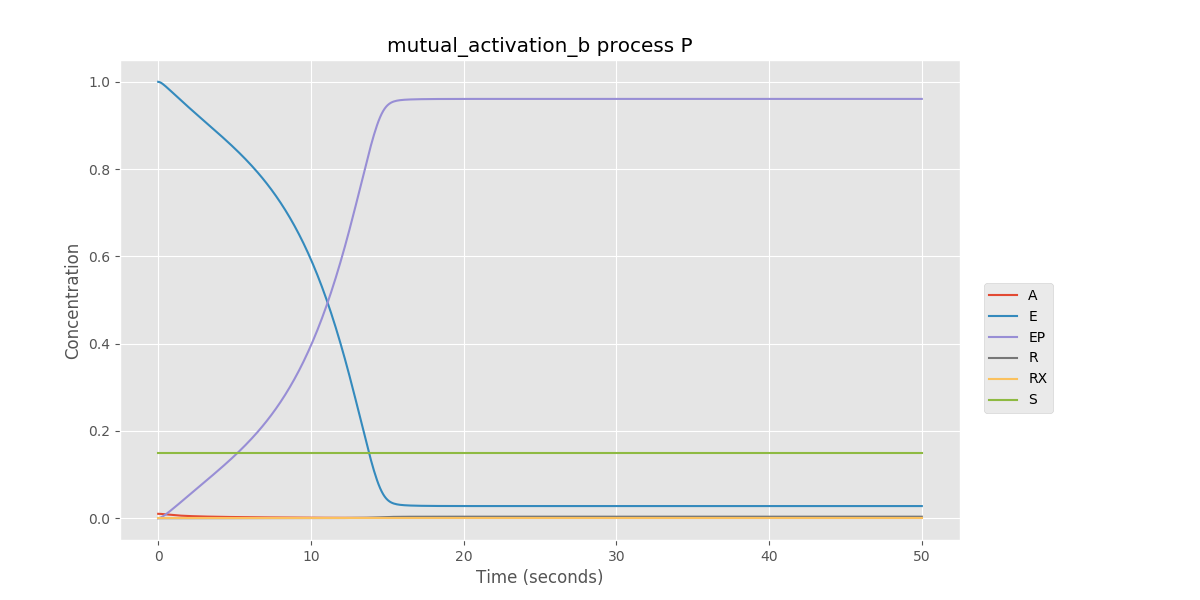

In [5]:
solution = cpi_model.simulate_process('P','odeint', 0, 50, 500)
solution.show_plot()